In [1]:
import pandas as pd
import random

# 1. Data Analysis

## 1.1 Load Data

In [2]:
filename = "train_sample.csv"
df_train = pd.read_csv(filename)

In [3]:
filename = "test_sample.csv"
df_test = pd.read_csv(filename)

In [4]:
display(df_train) # 60262 rows

,Unnamed: 0,Id,Title,Body,Tags
0,0,204,What is the best way to position a div in css?,<p>I'm trying to place this menu:</p>\n\n<p><c...,css layout
1,1,205,How to plot specific rows in GNUplot,<p>I have a two-column file which has 1000000 ...,gnuplot
2,2,515,Using variable-width font in Putty,"<p><a href=""http://the.earth.li/~sgtatham/putt...",windows fonts terminal putty variable-width
3,3,550,How to start a terminal window in the center o...,<p>It's kind of annoying how some Ubuntu (GNOM...,linux ubuntu configuration
4,4,558,Capture printStackTrace() output in Android,<p>I'm debugging an existing library that was ...,java android
...,...,...,...,...,...
60257,60257,6033523,PIL not rendering fonts uniformly across machines,<p>I wrote some code that spits out an image. ...,python pil
60258,60258,6033856,Symfony2 JSON example,<p>I'm trying to set up a json example using s...,php json rest symfony2
60259,60259,6033878,Extract amount in cents from currency within text,<p>Suppose I have arbitrary text with a curren...,java regex parsing
60260,60260,6033887,Can't hide CCMenuItem when using Inn-App-Purchase,<p>This time I would like to ask if anybody ha...,cocos2d-iphone cocos2d in-app-purchase ccmenuitem


In [5]:
display(df_test) # 20313 rows

,Unnamed: 0,Id,Title,Body
0,0,6034339,WPF Style trigger problem,<p>I want to write a Style for a Border elemen...
1,1,6034446,How to detect that streaming stopped AS3?,<p>I have a flash app and I need to detect whe...
2,2,6034550,Access the history state of the previous page ...,<p>Is there a way using JS of accessing the hi...
3,3,6034557,optimize SELECT {OTHER_COLUMNS} IN MAX....GROU...,<p>I am familar with the problems MySQL has if...
4,4,6034559,How to access the URL that Acegi has stored fo...,<p>I'm integrating Gigya with a web app runnin...
...,...,...,...,...
20308,20308,8047095,cloud for java software,<p>the cloud hit me now as well. The more I lo...
20309,20309,8047181,Good books on Distributed Computing/ Distribut...,<p>Please recommend good books on basics of di...
20310,20310,8047356,Caching a user control in ASP.NET?,<p>I have created a user control in my applica...
20311,20311,8047407,UPDATED: jquery dialog modal radio button not ...,<p>I have a problem here. I have a jquery moda...


## 1.2 Identify Duplicates

In [6]:
df_train[df_train[['Title', 'Body']].duplicated() == True] # 205 rows are duplicated

,Unnamed: 0,Id,Title,Body,Tags
3392,3392,337877,Remove a character at a certain position in a ...,<blockquote>\n <p><strong>Possible Duplicate:...,javascript string
4236,4236,425088,Client/Server UDP Program debugging in Eclipse,<p>I'm trying to debug my Client-Server UDP pr...,java eclipse debugging udp client-server
7847,7847,790037,IIS + Plesk queue problem,<p>I have a dedicated server running on Plesk ...,iis plesk application queue pool
8465,8465,851653,Is a function analytical on C iff its Fourier-...,<p>I think Cauchy's integral formula and the H...,analysis functional-analysis fourier-analysis
9300,9300,935437,TSQL: Create a view that accesses multiple dat...,"<p>I have a special case,</p>\n\n<p>for exampl...",sql-server database tsql view
...,...,...,...,...,...
59931,59931,6001647,tcpdump loses connection,<p>I'm on Ubuntu – but it's the same on Debian...,networking unix tcpdump
59997,59997,6010084,How to detect when phone is answered or rejected,<p>I managed to prepare an activity when the p...,android android-intent telephony
60076,60076,6017252,Horizontal scrollbar for textbox,<p>Is it possible to add a horizontal scrollba...,css
60131,60131,6022513,Will Application_Start also be triggered on pa...,<p>If I upload a new version of my site to my ...,asp.net


In [7]:
df_train_no_dup = df_train.copy().drop_duplicates(subset=["Title", "Body"])

In [8]:
dup_count = len(df_train.index) - len(df_train_no_dup.index)
print(dup_count) # 205 rows are duplicated

205


## 1.3 Tag Analysis

In [9]:
# distribution of tags
'''
3    17321
2    16155
4    11382
1     8192
5     7007
'''
df_train_no_dup["tag_count"] = df_train_no_dup["Tags"].apply(lambda _: len(_.split(" ")))
df_train_no_dup["tag_count"].value_counts()


3    17321
2    16155
4    11382
1     8192
5     7007
Name: tag_count, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(df_train_no_dup['Tags'])

In [12]:
print("Number of data points :", tag_dtm.shape[0]) # 60057
print("Number of unique tags :", tag_dtm.shape[1]) # 15054

Number of data points : 60057
Number of unique tags : 15054


In [13]:
tags = vectorizer.get_feature_names_out()
print("Some of the tags we have :", tags[:100])

Some of the tags we have : ['.bash-profile' '.class-file' '.each' '.htaccess' '.htpasswd' '.net'
 '.net-1.0' '.net-1.1' '.net-2.0' '.net-3.5' '.net-4.0' '.net-4.5'
 '.net-assembly' '.net-client-profile' '.net-framework'
 '.net-framework-version' '.net-remoting' '.nettiers' '.post' '.rdlc'
 '.refresh' '.screenrc' '1080p' '10gbethernet' '10gige' '128bit' '16bit'
 '1and1' '2-legged' '2007' '2010' '2013' '24hour' '2checkout' '2d'
 '2d-array' '3-tier' '3.0' '3.0.1' '3.1' '301-redirect' '32-bit' '32bit'
 '32bit-64bit' '389-ds' '3com' '3d' '3d-modelling' '3ds' '3dsmax' '3g'
 '3g-network' '3gp' '3nf' '3rd-party-controls' '3rd-party-library' '3ware'
 '404' '404-error' '443' '500-error' '50mm' '580exii' '64-bit' '64bit'
 '68000' '6to4' '7-zip' '7zip' '802.11' '802.1x' '8086' '9-11' '960.gs'
 'a-star' 'aac' 'aapt' 'abaddressbook' 'abap' 'abbr' 'abbreviation' 'abc'
 'abcpdf' 'abelian-categories' 'abelian-groups' 'abi' 'abmultivalue'
 'abort' 'about-config' 'abrecordref' 'absolute' 'absolute-path'


In [60]:
# Create mapping of tags to freq and store in a dataframe
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [62]:
df_tag = pd.DataFrame(result.items(), columns=['Tags', 'Counts'])

In [63]:
df_tag.loc[df_tag['Counts'] > 200]

,Tags,Counts
3,.htaccess,222
5,.net,1619
164,actionscript-3,254
315,ajax,653
354,algorithm,334
...,...,...
14563,winforms,412
14636,wordpress,318
14688,wpf,607
14785,xcode,495


In [64]:
import matplotlib.pyplot as plt

In [65]:
df_tag_sorted = df_tag.sort_values(['Counts'], ascending=False)
tag_counts = df_tag_sorted['Counts'].values

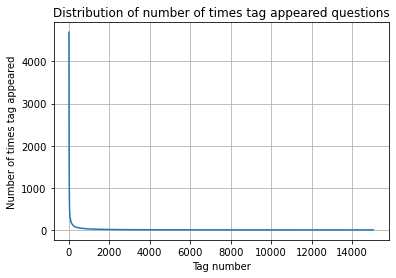

In [66]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

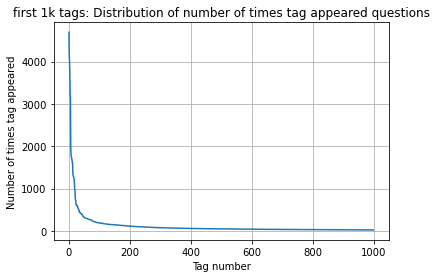

200 [4691 3159 1682 1283  964  607  535  447  412  364  321  299  293  274
  262  254  223  218  201  196  189  183  180  171  166  160  156  153
  150  148  145  142  138  136  131  129  125  122  119  117  114  110
  108  106  103  101   99   97   96   95   93   91   89   87   86   82
   81   81   79   77   76   74   73   72   71   71   71   70   69   69
   68   67   65   65   64   62   61   61   60   59   59   58   57   57
   57   55   55   55   54   54   53   52   52   52   51   50   50   49
   49   49   49   49   48   48   47   47   46   46   46   45   44   44
   44   44   43   43   43   43   42   42   42   41   41   40   40   40
   39   39   38   38   38   38   37   37   37   37   36   36   36   35
   35   35   34   34   34   34   34   34   33   33   33   33   33   33
   32   32   32   32   32   32   31   31   31   31   30   30   30   30
   30   29   29   29   29   29   29   28   28   28   28   28   27   27
   27   27   27   27   26   26   26   26   26   25   25   25   25   25
  

In [67]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

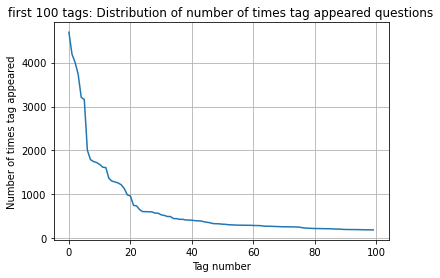

20 [4691 3159 1682 1283  964  607  535  447  412  364  321  299  293  274
  262  254  223  218  201  196]


In [68]:
plt.plot(tag_counts[0:100])
plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

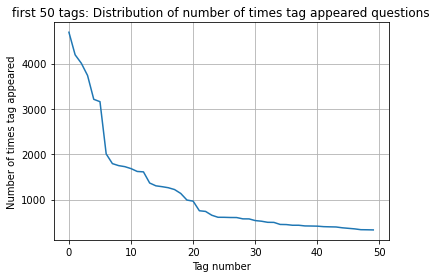

10 [4691 3159 1682 1283  964  607  535  447  412  364]


In [69]:
plt.plot(tag_counts[0:50])
plt.title('first 50 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:50:5]), tag_counts[0:50:5])

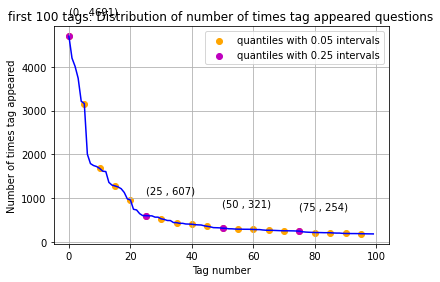

20 [4691 3159 1682 1283  964  607  535  447  412  364  321  299  293  274
  262  254  223  218  201  196]


In [70]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(text="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [75]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = df_tag[df_tag.Counts>100].Tags
#Print the length of the list
print ('{} Tags are used more than 100 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = df_tag[df_tag.Counts>1000].Tags
#Print the length of the list.
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_100k)))

226 Tags are used more than 100 times
19 Tags are used more than 10000 times


In [40]:
df_tag.index.values

array(['.bash-profile', '.class-file', '.each', ..., 'zune-software',
       'zurb-foundation', 'zxing'], dtype=object)

In [76]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 60057 datapoints.
[2, 1, 5, 3, 2]


In [73]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.881063


In [74]:
from datetime import datetime
from wordcloud import WordCloud

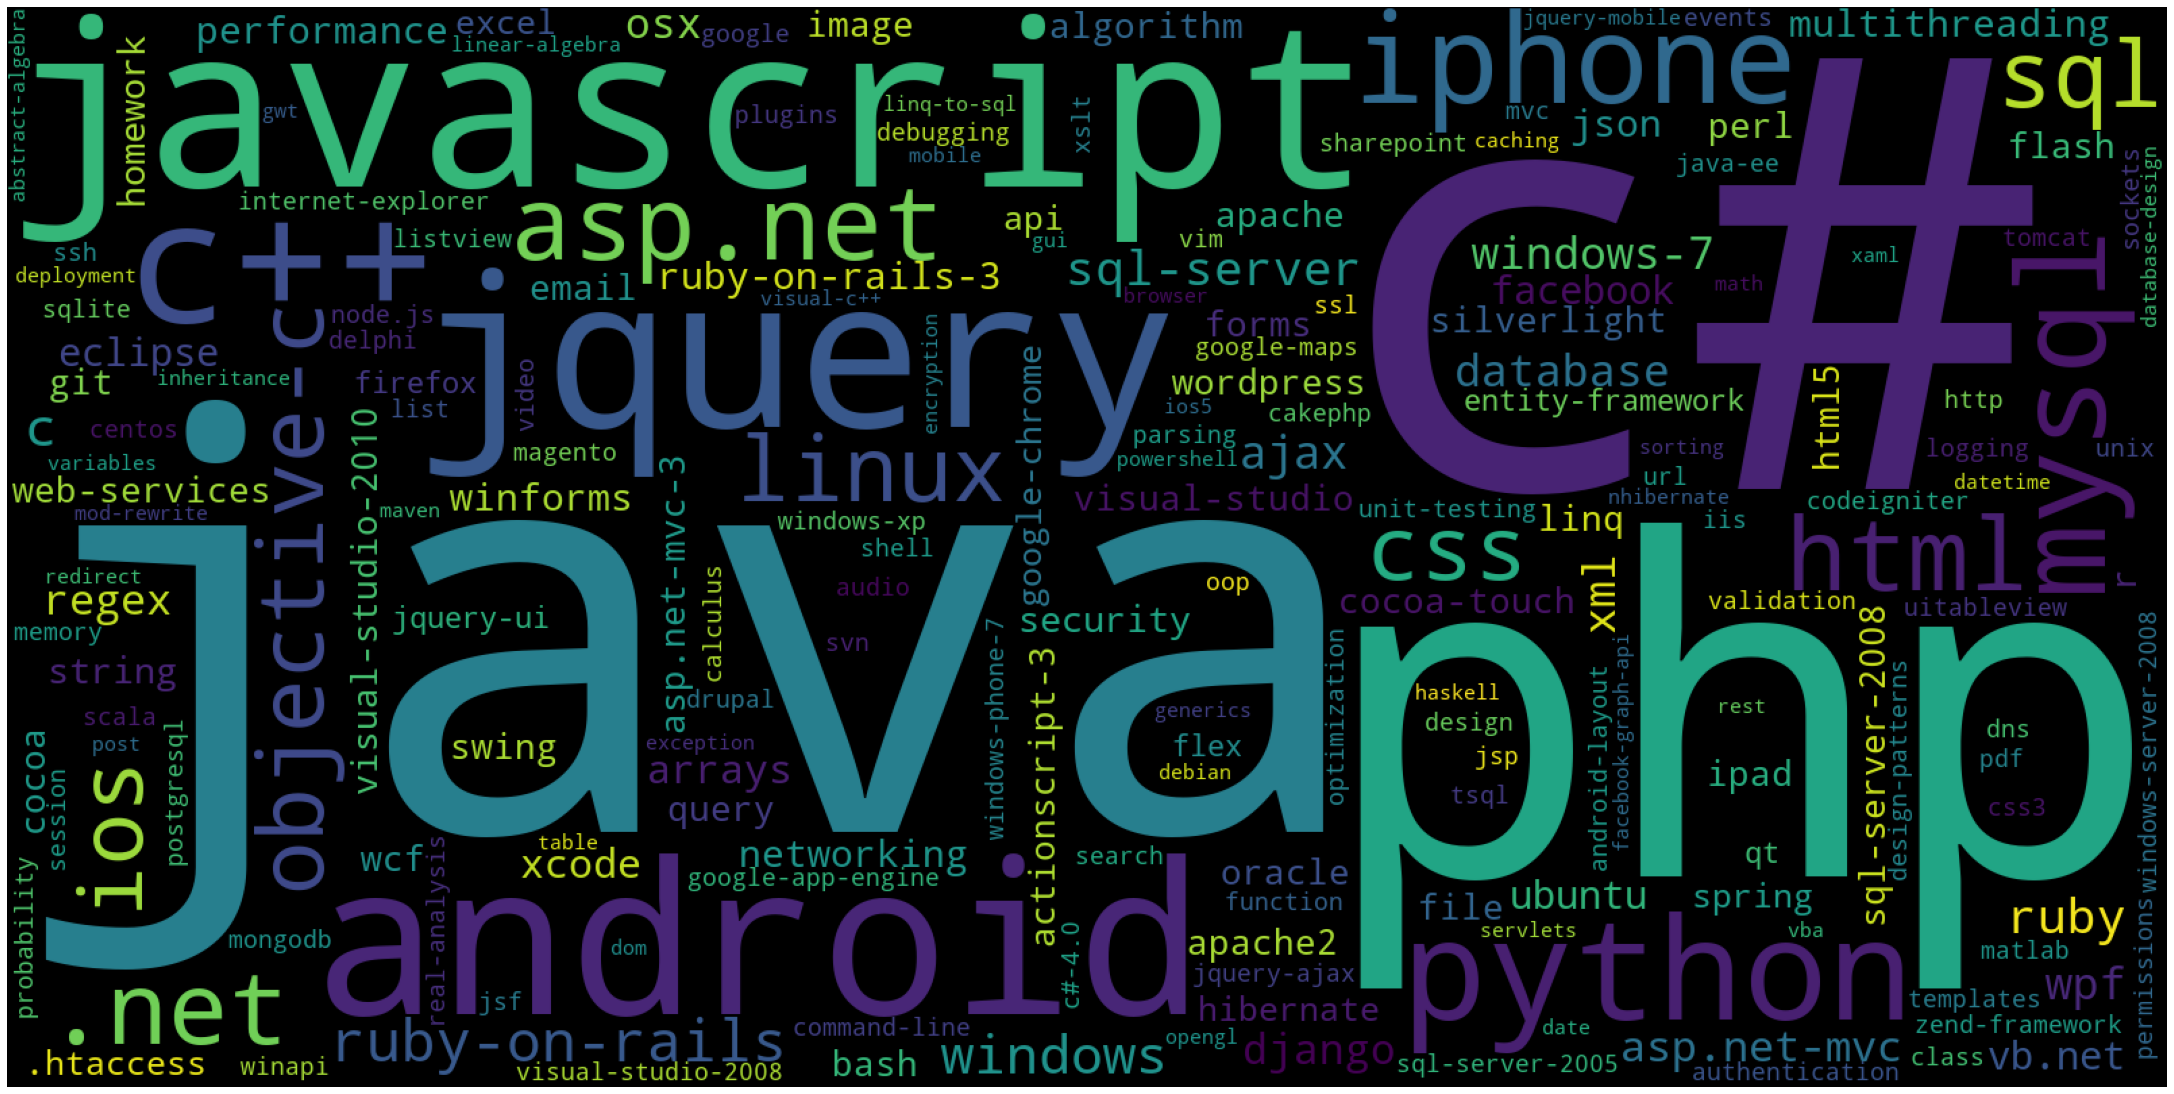

Time taken to run this cell : 0:00:02.722481


In [53]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

In [55]:
import numpy as np

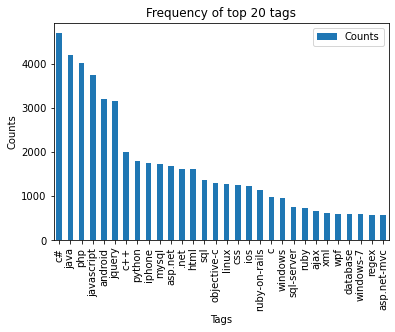

In [79]:
i=np.arange(30)
df_tag_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, df_tag_sorted['Tags'][:30])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

# 2 Cleaning and preprocessing of Questions

Separate out code-snippets from Body
Remove Spcial characters from Question title and description (not in code)
Remove stop words (Except 'C')
Remove HTML Tags
Convert all the characters into small letters
Use SnowballStemmer to stem the words

In [130]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kinchang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kinchang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [133]:
start = datetime.now()
preprocessed_data_list=[]
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
processed_rows = []
for row in df_train_no_dup[['Title','Body','Tags']].to_numpy():

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    processed_rows.append(tup)
    if (questions_proccesed%1000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 1000
number of questions completed= 2000
number of questions completed= 3000
number of questions completed= 4000
number of questions completed= 5000
number of questions completed= 6000
number of questions completed= 7000
number of questions completed= 8000
number of questions completed= 9000
number of questions completed= 10000
number of questions completed= 11000
number of questions completed= 12000
number of questions completed= 13000
number of questions completed= 14000
number of questions completed= 15000
number of questions completed= 16000
number of questions completed= 17000
number of questions completed= 18000
number of questions completed= 19000
number of questions completed= 20000
number of questions completed= 21000
number of questions completed= 22000
number of questions completed= 23000
number of questions completed= 24000
number of questions completed= 25000
number of questions completed= 26000
number of questions completed= 27000
number of 

In [134]:
column_names = ['question','code','tags','words_pre','words_post','is_code']
df_processed = pd.DataFrame(processed_rows, columns = column_names)

In [137]:
df_processed.to_csv("processed_sample.csv")

# 3. Machine Learning Models

In [138]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df_processed['tags'])

In [139]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [141]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=df_processed.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

/var/folders/4r/z4c5m78x2tqgbkj8hx9jx2cm0000gn/T/ipykernel_45979/3278752658.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabel)


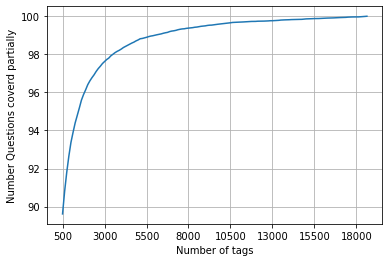

with  5500 tags we are covering  99.152 % of questions


In [151]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# choose any number of tags based on the computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [152]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 509 out of  60057


In [153]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 15054
number of tags taken : 5500 ( 36.53514016208317 %)


## Split in Train and Test (20:80)

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

In [154]:
total_size=df_processed.shape[0]
train_size=int(0.80*total_size)

x_train=df_processed.head(train_size)
x_test=df_processed.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [155]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (48045, 5500)
Number of data points in test data : (12012, 5500)


In [158]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:13.447486


In [159]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (48045, 94933) Y : (48045, 5500)
Dimensions of test data X: (12012, 94933) Y: (12012, 5500)


## Applying Logistic Regression with OneVsRest Classifier

In [167]:
# This takes about 6-7 hours to run.
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 3724 is present in all training examples.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 5012 is present in all training examples.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 5084 is present in all training examples.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 5101 is present in all training examples.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 5170 is present in all training examples.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-package

accuracy : 0.07842157842157842
macro f1 score : 0.07062686844181146
micro f1 scoore : 0.3665153156475442
hamming loss : 0.0004160233705688251
Precision recall report :
               precision    recall  f1-score   support

           0       0.61      0.25      0.36       972
           1       0.76      0.45      0.56       813
           2       0.80      0.55      0.65       762
           3       0.73      0.44      0.55       744
           4       0.97      0.76      0.85       646
           5       0.82      0.66      0.73       634
           6       0.72      0.30      0.42       421
           7       0.91      0.57      0.70       361
           8       0.68      0.43      0.52       347
           9       0.84      0.60      0.70       389
          10       0.72      0.44      0.55       315
          11       0.49      0.11      0.18       342
          12       0.51      0.17      0.25       349
          13       0.53      0.26      0.34       290
          14       0

/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/qtest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _wa

In [169]:
import joblib
joblib.dump(classifier, 'lr_with_equal_weight.pkl') 

['lr_with_equal_weight.pkl']